In [ ]:
import pandas as pd 
import numpy as np  
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  

In [64]:

files = ['202505_cht.ods','202506_cht.ods','202507_cht.ods']
entry_data = pd.Series()
exit_data = pd.Series()
select_num  = 4
f = pd.read_excel(files[0], engine='odf', sheet_name=1)
r_v = np.random.choice(f.keys(),(select_num,), replace=False)
for f in files:
    entry_f = pd.read_excel(f, engine='odf', sheet_name=1)[np.hstack((r_v,np.array(["　　　　車站日期"])))]
    exit_f = pd.read_excel(f, engine='odf', sheet_name=0)[np.hstack((r_v,np.array(["　　　　車站日期"])))]
    
    if entry_data.empty and exit_data.empty:
        entry_data = entry_f
        exit_data = exit_f
        continue
    entry_data = pd.concat([entry_data, entry_f], ignore_index=True)
    exit_data = pd.concat([exit_data, exit_f], ignore_index=True)
print(entry_data)

date_data = entry_data['　　　　車站日期']
entry_data.drop(['　　　　車站日期'], axis=1, inplace=True)
exit_data.drop(['　　　　車站日期'], axis=1, inplace=True)

       公館    葫洲    竹圍    小南門   　　　　車站日期
0   27853  7212  8591   9264 2025-05-01
1   33153  9900  9871  12579 2025-05-02
2   27622  6292  8418   5374 2025-05-03
3   21803  5023  7022   4275 2025-05-04
4   26332  9011  9373  12341 2025-05-05
..    ...   ...   ...    ...        ...
87  20552  5125  6278   3762 2025-07-27
88  23652  8238  8991  10526 2025-07-28
89  25374  8328  8925  10237 2025-07-29
90  26462  8417  9460  10674 2025-07-30
91  25547  8569  9191  10324 2025-07-31

[92 rows x 5 columns]


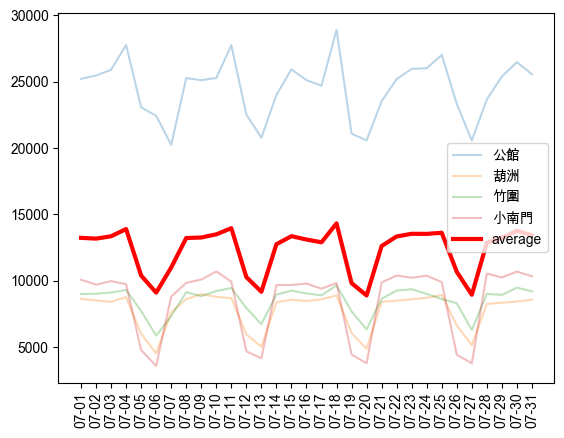

In [65]:

month_date = [31,30,31]
random_month = np.random.choice([1,2,3])
start_day = sum(month_date[:random_month-1])
end_day = start_day + month_date[random_month-1]
for entry_name in entry_data.keys():
    plt.plot(entry_data[entry_name][start_day:end_day], label=f'{entry_name}', alpha=0.3)

entry_avg = np.average(entry_data[:], axis=1)
entry_avg = pd.Series(entry_avg, index=entry_data.index)
entry_avg.dropna(inplace=True)
plt.plot(entry_avg[start_day:end_day], label='entry_avg', color='red', linewidth=3)


date_series = pd.to_datetime(date_data[start_day:end_day])
dates = date_series.dt.strftime('%m-%d').to_list()
plt.xticks(range(start_day, end_day), dates, rotation=90)
plt.legend(entry_data.keys().to_list()+['average'])
plt.show()

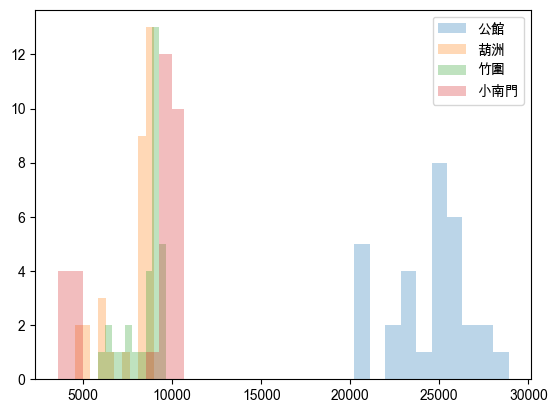

In [ ]:
for entry_name in entry_data.keys():
    plt.hist(entry_data[entry_name][start_day:end_day], label=f'{entry_name}', alpha=0.3)

In [9]:
import numpy as np
np.random.randint(len([1,2,3,4]))

0